In [ ]:
#REVISAR
from sklearn.datasets import make_classification #LIBRERIA PARA GENERAR DATOS DE CLASIFICACIÓN


In [ ]:
# === BLOQUE 1: Librerías y carga de datos ===
import pandas as pd #dataframes y manejo de datos
import numpy as np #operaciones numéricas arreglos y matrices
import matplotlib.pyplot as plt #graficación
import seaborn as sns #graficación avanzada

# Configuración visual
pd.set_option('display.max_columns', None)
plt.style.use('default')

# === Cargar archivos Excel (ajusta rutas si es necesario) ===
clientes = pd.read_excel("databases/Clientes.xlsx")
productos = pd.read_excel("databases/Productos.xlsx")
ventas = pd.read_excel("databases/Ventas.xlsx")
detalle_ventas = pd.read_excel("databases/Detalle_ventas.xlsx")

# Mostrar una vista rápida
print("Clientes:", clientes.shape)
print("Productos:", productos.shape)
print("Ventas:", ventas.shape)
print("Detalle ventas:", detalle_ventas.shape)


Clientes: (100, 5)
Productos: (100, 4)
Ventas: (120, 6)
Detalle ventas: (343, 6)


In [4]:
# === BLOQUE 2: Inspección y limpieza básica ===

# Revisar valores nulos
for name, df in [("clientes", clientes), ("productos", productos), ("ventas", ventas), ("detalle_ventas", detalle_ventas)]:
    print(f"\n{name.upper()} - Valores nulos por columna:")
    print(df.isnull().sum())

# Eliminar duplicados (si existen)
clientes = clientes.drop_duplicates(subset="id_cliente")
productos = productos.drop_duplicates(subset="id_producto")
ventas = ventas.drop_duplicates(subset="id_venta")
detalle_ventas = detalle_ventas.drop_duplicates()

# Asegurar tipos correctos
ventas["fecha"] = pd.to_datetime(ventas["fecha"], errors='coerce')
clientes["fecha_alta"] = pd.to_datetime(clientes["fecha_alta"], errors='coerce')

# Recalcular el importe si no está
if "importe" not in detalle_ventas.columns or detalle_ventas["importe"].isnull().any():
    detalle_ventas["importe"] = detalle_ventas["cantidad"] * detalle_ventas["precio_unitario"]



CLIENTES - Valores nulos por columna:
id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

PRODUCTOS - Valores nulos por columna:
id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64

VENTAS - Valores nulos por columna:
id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

DETALLE_VENTAS - Valores nulos por columna:
id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64


In [ ]:
# === BLOQUE 3: Unión de tablas ===

# detalle_ventas + productos
df = detalle_ventas.merge(productos, on="id_producto", suffixes=("", "_prod"))

# + ventas
df = df.merge(ventas, on="id_venta", suffixes=("", "_venta"))

# + clientes
df = df.merge(clientes, on="id_cliente", suffixes=("", "_cliente"))

# Selección de columnas relevantes
df = df[[
    "id_venta", "fecha", "ciudad", "medio_pago",
    "categoria", "nombre_producto", "cantidad",
    "precio_unitario", "importe"
]]

print("DataFrame final:", df.shape)
df.head() #imprime los primeros 5 registros


DataFrame final: (343, 9)


,id_venta,fecha,ciudad,medio_pago,categoria,nombre_producto,cantidad,precio_unitario,importe
0,1,2024-06-19,Carlos Paz,tarjeta,Limpieza,Toallas Húmedas x50,1,2902,2902
1,2,2024-03-17,Rio Cuarto,qr,Limpieza,Aceitunas Negras 200g,5,2394,11970
2,2,2024-03-17,Rio Cuarto,qr,Alimentos,Helado Vainilla 1L,5,469,2345
3,2,2024-03-17,Rio Cuarto,qr,Limpieza,Fernet 750ml,2,4061,8122
4,2,2024-03-17,Rio Cuarto,qr,Limpieza,Medialunas de Manteca,1,2069,2069


In [ ]:
print(df.columns.tolist())


['id_venta', 'id_producto', 'nombre_producto', 'cantidad', 'precio_unitario', 'importe', 'nombre_producto_prod', 'categoria', 'precio_unitario_prod', 'fecha', 'id_cliente', 'nombre_cliente', 'email', 'medio_pago', 'nombre_cliente_cliente', 'email_cliente', 'ciudad', 'fecha_alta']


In [ ]:
# === BLOQUE 4: Estadísticas descriptivas ===

print("Resumen general:\n")
display(df.describe(include='all'))

print("\nResumen numérico:\n")
display(df[["cantidad", "precio_unitario", "importe"]].describe())

# Estadísticas agrupadas por categoría
df.groupby("categoria")[["cantidad", "importe"]].describe()


Resumen general:



,id_venta,fecha,ciudad,medio_pago,categoria,nombre_producto,cantidad,precio_unitario,importe
count,343.000000,343,343,343,343,343,343.000000,343.000000,343.000000
unique,NaN,NaN,6,4,2,95,NaN,NaN,NaN
top,NaN,NaN,Rio Cuarto,efectivo,Limpieza,Queso Rallado 150g,NaN,NaN,NaN
freq,NaN,NaN,104,111,178,9,NaN,NaN,NaN
mean,61.492711,2024-03-30 14:12:14.693877504,NaN,NaN,NaN,NaN,2.962099,2654.495627,7730.078717
min,1.000000,2024-01-02 00:00:00,NaN,NaN,NaN,NaN,1.000000,272.000000,272.000000
25%,31.000000,2024-02-10 12:00:00,NaN,NaN,NaN,NaN,2.000000,1618.500000,3489.000000
50%,61.000000,2024-03-26 00:00:00,NaN,NaN,NaN,NaN,3.000000,2512.000000,6702.000000
75%,93.000000,2024-05-21 00:00:00,NaN,NaN,NaN,NaN,4.000000,3876.000000,10231.500000
max,120.000000,2024-06-28 00:00:00,NaN,NaN,NaN,NaN,5.000000,4982.000000,24865.000000



Resumen numérico:



,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000
mean,2.962099,2654.495627,7730.078717
std,1.366375,1308.694720,5265.543077
min,1.000000,272.000000,272.000000
25%,2.000000,1618.500000,3489.000000
50%,3.000000,2512.000000,6702.000000
75%,4.000000,3876.000000,10231.500000
max,5.000000,4982.000000,24865.000000


cantidad                                              importe  \
             count      mean       std  min  25%  50%  75%  max   count   
categoria                                                                 
Alimentos    165.0  3.018182  1.376956  1.0  2.0  3.0  4.0  5.0   165.0   
Limpieza     178.0  2.910112  1.358301  1.0  2.0  3.0  4.0  5.0   178.0   

                                                                              
                  mean          std    min     25%     50%      75%      max  
categoria                                                                     
Alimentos  7364.460606  5096.416547  272.0  3328.0  6324.0  10048.0  22150.0  
Limpieza   8068.994382  5409.827167  503.0  3962.0  7566.0  10332.0  24865.0

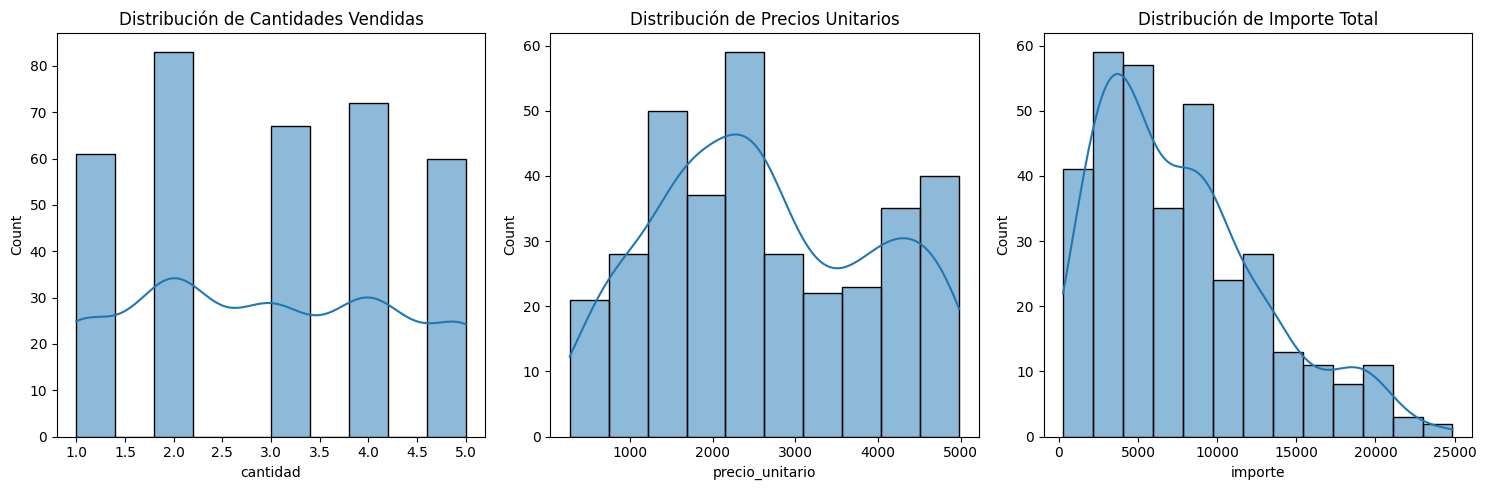

In [ ]:
# === BLOQUE 5: Distribución de variables ===

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df["cantidad"], kde=True, ax=axes[0])
axes[0].set_title("Distribución de Cantidades Vendidas")

sns.histplot(df["precio_unitario"], kde=True, ax=axes[1])
axes[1].set_title("Distribución de Precios Unitarios")

sns.histplot(df["importe"], kde=True, ax=axes[2])
axes[2].set_title("Distribución de Importe Total")

plt.tight_layout()
plt.show()


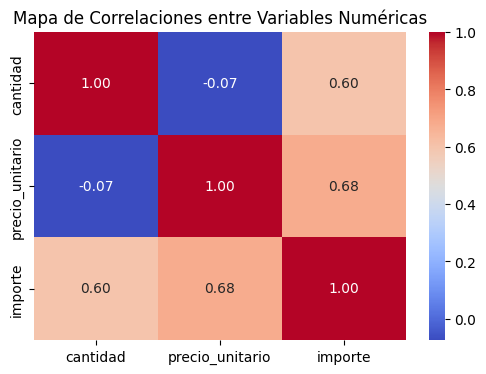

,cantidad,precio_unitario,importe
cantidad,1.000000,-0.074483,0.599723
precio_unitario,-0.074483,1.000000,0.679298
importe,0.599723,0.679298,1.000000


In [ ]:
# === BLOQUE 6: Correlaciones ===
corr = df[["cantidad", "precio_unitario", "importe"]].corr() #metodo corr() calculo de correlacion

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlaciones entre Variables Numéricas")
plt.show()

corr


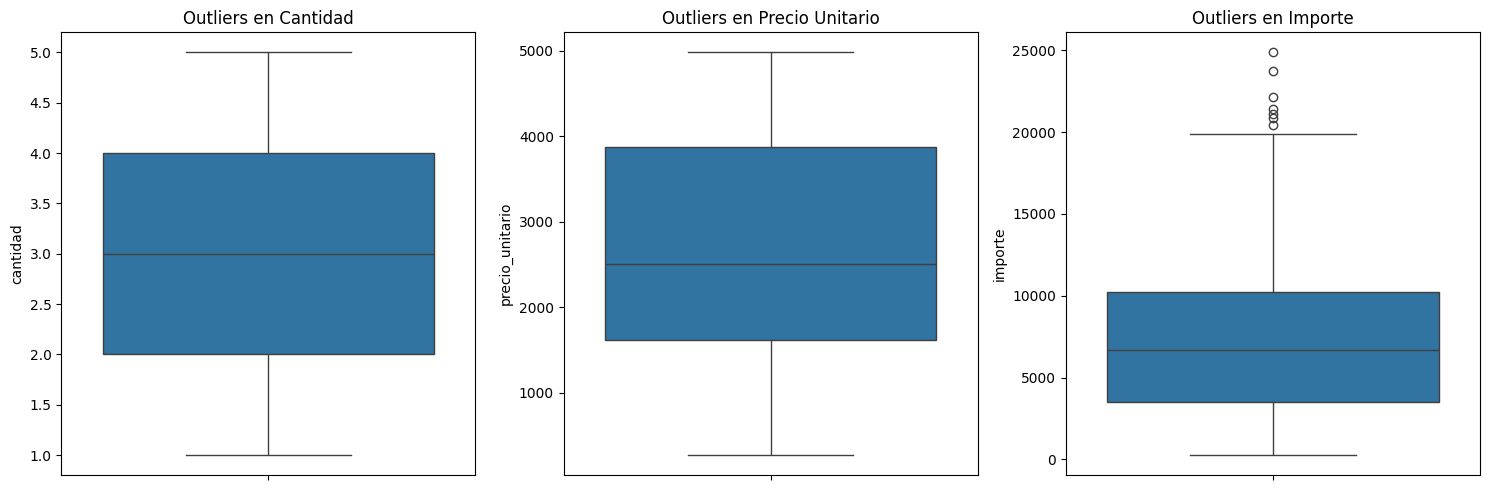

Número de outliers por variable:
cantidad           0
precio_unitario    0
importe            7
dtype: int64


In [ ]:
# === BLOQUE 7: Detección de valores extremos (outliers) ===

fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(y=df["cantidad"], ax=axes[0])
axes[0].set_title("Outliers en Cantidad")

sns.boxplot(y=df["precio_unitario"], ax=axes[1])
axes[1].set_title("Outliers en Precio Unitario")

sns.boxplot(y=df["importe"], ax=axes[2])
axes[2].set_title("Outliers en Importe")

plt.tight_layout()
plt.show()

# Detección numérica con método IQR
Q1 = df[["cantidad", "precio_unitario", "importe"]].quantile(0.25)
Q3 = df[["cantidad", "precio_unitario", "importe"]].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[["cantidad", "precio_unitario", "importe"]] < (Q1 - 1.5 * IQR)) |
            (df[["cantidad", "precio_unitario", "importe"]] > (Q3 + 1.5 * IQR)))

print("Número de outliers por variable:")
print(outliers.sum())


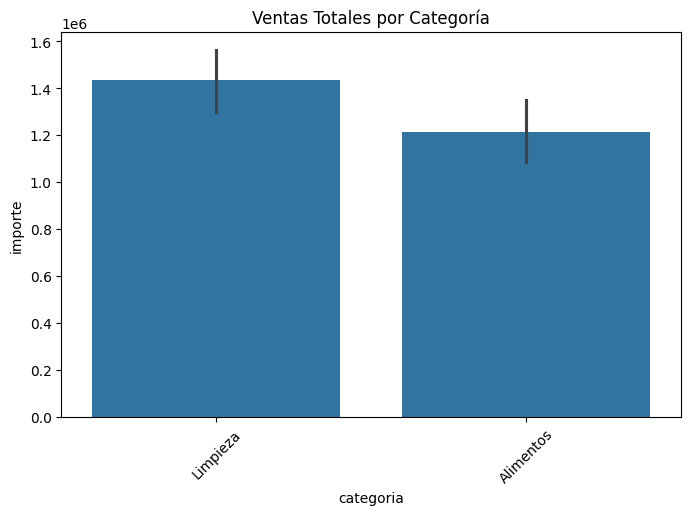

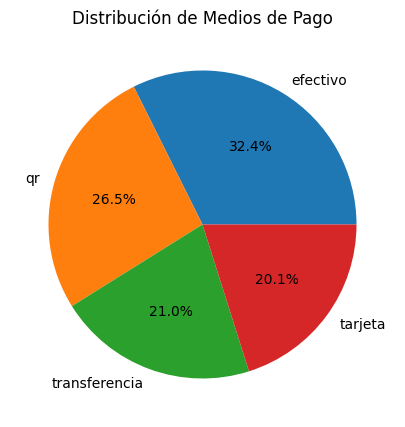

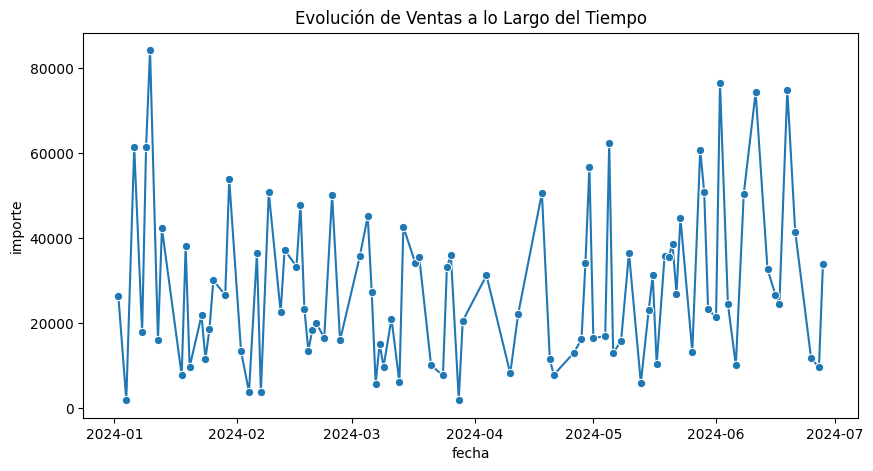

In [ ]:
# === BLOQUE 8: Gráficos representativos ===

# 1. Ventas totales por categoría
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="categoria", y="importe", estimator=sum)
plt.title("Ventas Totales por Categoría")
plt.xticks(rotation=45)
plt.show()

# 2. Medios de pago más utilizados
plt.figure(figsize=(6,5))
df["medio_pago"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribución de Medios de Pago")
plt.ylabel("")
plt.show()

# 3. Evolución temporal de ventas
df_por_fecha = df.groupby("fecha")["importe"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_por_fecha, x="fecha", y="importe", marker="o")
plt.title("Evolución de Ventas a lo Largo del Tiempo")
plt.show()
